### Pandas Basics for Data Analysis
The name pandas comes from **pan**el **da**ta. If you've worked in excel before, this way of organizing data should look familiar to you. 
  
Pandas has two main data structures; a **dataframe** and a **series**. A dataframe is merely a container of series strung together. Thus, each column in a dataframe is a series with its own set of methods. Both dataframes and series have an **index**, which can be either numbers or strings and which cannot contain duplicates, because it is supposed to refer to a unique row or observation in the data. 

Pandas is a huge library with a lot of functionality - it's always a good idea to keep the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) near by for reference.
  
It is good practice to keep our data **tidy** - each row would be an observation, each column a variable, and at the intersection of each, a value.
![tidy data](https://r4ds.had.co.nz/images/tidy-1.png)

In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns


In [3]:
#Read csv file
df = pd.read_csv("https://raw.githubusercontent.com/Apress/data-analysis-and-visualization-using-python/master/Ch07/Salaries.csv")


In [5]:
#List first 5 records

df.head(n=5)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


In [6]:
df.dtypes

rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

In [9]:
#Check types for all the columns
df.describe()



,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [13]:
df2=df.head(50)

df2.mean(numeric_only=True)

phd            21.52
service        17.60
salary     113789.14
dtype: float64

In [ ]:
df.mean(numeric_only=True)

phd            19.705128
service        15.051282
salary     108023.782051
dtype: float64

In [14]:
y=df['salary']

In [16]:
df.salary

0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

In [17]:
#Group data using rank
df_rank = df.groupby(['rank'])


In [18]:
#Calculate mean value for each numeric column per each group
df_rank.mean()


,phd,service,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348


In [22]:
#Calculate mean salary for each professor rank:
df.groupby('rank')[['salary']].mean()


,salary
rank,
AssocProf,91786.230769
AsstProf,81362.789474
Prof,123624.804348


In [23]:
df['salary'] < 120000

0     False
1      True
2      True
3     False
4      True
      ...  
73     True
74     True
75    False
76     True
77     True
Name: salary, Length: 78, dtype: bool

In [27]:
df

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


In [28]:
#Select rows that default to true using conditional statement:

df_sub = df[ df['salary'] > 120000 ]
print(df.shape)
df_sub.shape

(78, 6)


(25, 6)

In [29]:
#Select only those rows that contain female professors:
df_f = df[ df['sex'] == 'Female' ]
print(df_f.shape)


(39, 6)


In [31]:
#Select column salary:
df[0:5]


,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


In [32]:
#Select columns rank and salary:
df[['rank','salary']]


,rank,salary
0,Prof,186960
1,Prof,93000
2,Prof,110515
3,Prof,131205
4,Prof,104800
...,...,...
73,Prof,105450
74,AssocProf,104542
75,Prof,124312
76,Prof,109954


In [ ]:
#Select rows by their position:
df[10:20]


,rank,discipline,phd,service,sex,salary
10,Prof,B,39,33,Male,128250
11,Prof,B,23,23,Male,134778
12,AsstProf,B,1,0,Male,88000
13,Prof,B,35,33,Male,162200
14,Prof,B,25,19,Male,153750
15,Prof,B,17,3,Male,150480
16,AsstProf,B,8,3,Male,75044
17,AsstProf,B,4,0,Male,92000
18,Prof,A,19,7,Male,107300
19,Prof,A,29,27,Male,150500


In [33]:
#Select rows by their labels:
X=df.loc[:,['salary','phd']]


,salary,phd
0,186960,56
1,93000,12
2,110515,23
3,131205,40
4,104800,20
...,...,...
73,105450,18
74,104542,19
75,124312,17
76,109954,28


In [34]:
#select a range of rows and/or columns, using their positions:
df_sub.iloc[10:20,[0, 3, 4, 5]]


,rank,service,sex,salary
26,Prof,19,Male,148750
27,Prof,43,Male,155865
29,Prof,20,Male,123683
31,Prof,21,Male,155750
35,Prof,23,Male,126933
36,Prof,45,Male,146856
39,Prof,18,Female,129000
40,Prof,36,Female,137000
44,Prof,19,Female,151768
45,Prof,25,Female,140096


In [ ]:
df.iloc[0]  # First row of a data frame
df.iloc[i]  #(i+1)th row 
df.iloc[-1] # Last row 




In [ ]:
df.iloc[:, 0]  # First column
df.iloc[:, -1] # Last column 



In [ ]:
df.iloc[0:7]       #First 7 rows 
df.iloc[:, 0:2]    #First 2 columns
df.iloc[1:3, 0:2]  #Second through third rows and first 2 columns
df.iloc[[0,5], [1,3]]  #1st and 6th rows and 2nd and 4th columns

,discipline,service
0,B,49
5,A,20


In [ ]:
# Create a new data frame from the original sorted by the column Salary
df_sorted = df.sort_values( by ='service')
df_sorted.head()


,rank,discipline,phd,service,sex,salary
55,AsstProf,A,2,0,Female,72500
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000


In [ ]:
# Sort the data using 2 or more columns:

df_sorted = df.sort_values( by =['service', 'salary'], ascending = [True, False])
df_sorted.head(10)


,rank,discipline,phd,service,sex,salary
52,Prof,A,12,0,Female,105000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
55,AsstProf,A,2,0,Female,72500
57,AsstProf,A,3,1,Female,72500
28,AsstProf,B,7,2,Male,91300
42,AsstProf,B,4,2,Female,80225
68,AsstProf,A,4,2,Female,77500


It's also quite easy to save your dataframe. We save using a new filename because we don't want to overwrite the first one.

In [ ]:
df.to_csv('mydata.csv') #chose a new file name otherwise you will overwrite the original

## Adding new columns to our data

In [ ]:
#Read csv file
df = pd.read_csv("https://cand3workshopbucket.s3.amazonaws.com/geo.csv")


In [ ]:
df.head()

,name,region,oecd,g77,lat,long,income2017
0,Afghanistan,asia,False,True,33.00000,66.00000,low
1,Albania,europe,False,False,41.00000,20.00000,upper_mid
2,Algeria,africa,False,True,28.00000,3.00000,upper_mid
3,Andorra,europe,False,False,42.50779,1.52109,high
4,Angola,africa,False,True,-12.50000,18.50000,lower_mid


Below we can create new columns based on the values in other columns.

In [ ]:
df['imaginary_numbers'] = df['lat'] + df['long']+1
df.head()

,name,region,oecd,g77,lat,long,income2017,imaginary_numbers
0,Afghanistan,asia,False,True,33.00000,66.00000,low,100.00000
1,Albania,europe,False,False,41.00000,20.00000,upper_mid,62.00000
2,Algeria,africa,False,True,28.00000,3.00000,upper_mid,32.00000
3,Andorra,europe,False,False,42.50779,1.52109,high,45.02888
4,Angola,africa,False,True,-12.50000,18.50000,lower_mid,7.00000


In [ ]:
df['southern_oecd'] = (df.lat<0) & (df.oecd==True)
df.head(10)

,name,region,oecd,g77,lat,long,income2017,imaginary_numbers,southern_oecd
0,Afghanistan,asia,False,True,33.00000,66.00000,low,100.00000,False
1,Albania,europe,False,False,41.00000,20.00000,upper_mid,62.00000,False
2,Algeria,africa,False,True,28.00000,3.00000,upper_mid,32.00000,False
3,Andorra,europe,False,False,42.50779,1.52109,high,45.02888,False
4,Angola,africa,False,True,-12.50000,18.50000,lower_mid,7.00000,False
5,Antigua and Barbuda,americas,False,True,17.05000,-61.80000,high,-43.75000,False
6,Argentina,americas,False,True,-34.00000,-64.00000,upper_mid,-97.00000,False
7,Armenia,europe,False,False,40.25000,45.00000,lower_mid,86.25000,False
8,Australia,asia,True,False,-25.00000,135.00000,high,111.00000,True
9,Austria,europe,True,False,47.33333,13.33333,high,61.66666,False


### Renaming

In [ ]:
df.rename(columns={'lat':'latitude'}, inplace=True)

In [ ]:
df.head()

,name,region,oecd,g77,latitude,long,income2017,imaginary_numbers,southern_oecd
0,Afghanistan,asia,False,True,33.00000,66.00000,low,100.00000,False
1,Albania,europe,False,False,41.00000,20.00000,upper_mid,62.00000,False
2,Algeria,africa,False,True,28.00000,3.00000,upper_mid,32.00000,False
3,Andorra,europe,False,False,42.50779,1.52109,high,45.02888,False
4,Angola,africa,False,True,-12.50000,18.50000,lower_mid,7.00000,False


✮ The `inplace` parameter will show up often in pandas method definitions. It is used when pandas will by default return a *new* dataframe that has been created from your operation. You can use `inplace=True` to assign that new dataframe back to the original variable.

## Joining and Merging
There are [several ways](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) to join together data in pandas. Merging is distinct from joining is distinct from concatenating. Merging is "column-on-column" and joinging is "index-on-index," while concatenation is simply joining dataframes end-to-end.   

### "Key" concept
Remember that a dataframe has an index, which is a sequence of values. Each observation in the data has value in the index. When joining and merging, the index often serves as the **key** used to join two dataframes together. 

### Joining
Let's start by looking at basic **join** using an example from the pandas documentation.

In [ ]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                      'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                       'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [ ]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [ ]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [ ]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


Notice that there is no `K3` observation in the resulting dataframe, nor is there a `C` or `D` value  for `K1`. This is because the default `join` is a left one. Panda's join allows for four types of joins, inner, outter, left, and right. In the case of a left join, all observations in the left table are kept. Information regarding them from the right table is kept, while observations unique to the right table are discarded. This classic illustration should provide some intuition on the four types of joins.  
![joins](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)  
**➤ Try changing the `how` parameter below to see different joins.**

In [ ]:
left.join(right, how = 'right')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


### Merging
The `merge()` method in pandas brings a lot more functionality to the basic join. One of the perks of using this method is a finer control over which columns will serve as the keys - or, using the intersection of columns (the columns that both dataframes share). Let's reuse our `left` and `right` dataframes with a slight modification.

In [ ]:
left['E'] = ['E0', 'E1', 'E2']
right['E'] = ['E0', 'E1', 'E2']

left.merge(right)

,A,B,E,C,D
0,A0,B0,E0,C0,D0
1,A1,B1,E1,C2,D2
2,A2,B2,E2,C3,D3


Merge performed a left join again, but instead of using the index as a key, it defaulted to using the column that they had in common, `E`.


### Appending
Finally, we can also append a single row (rather than an entire dataframe) by creating a Series and using the parameter `ignore_index=True.`

In [ ]:
my_coords = (51.88999644,1.476164762)
my_country = pd.Series({'name':'Sealand','region':'europe','oecd':False,'g77':False, 
                        'latitude':my_coords[0], 'long':my_coords[1],'income2017':'low', 
                        'imaginary_numbers':my_coords[0]+my_coords[1],'southern_oecd':False})
my_country

name                 Sealand
region                europe
oecd                   False
g77                    False
latitude               51.89
long                 1.47616
income2017               low
imaginary_numbers    53.3662
southern_oecd          False
dtype: object

In [ ]:
df = df.append(my_country,ignore_index=True) # we need this ignore index in order to insert our country into
                                             # the index range of the existing dataframe
df.tail()

,name,region,oecd,g77,latitude,long,income2017,imaginary_numbers,southern_oecd
192,Yemen,asia,False,True,15.500000,47.500000,lower_mid,64.000000,False
193,Zambia,africa,False,True,-14.333330,28.500000,lower_mid,15.166670,False
194,Zimbabwe,africa,False,True,-19.000000,29.750000,low,11.750000,False
195,South Sudan,africa,False,True,7.500000,30.000000,low,38.500000,False
196,Sealand,europe,False,False,51.889996,1.476165,low,53.366161,False


## Plotting
`Matplotlib` is a legacy package for plotting, and is the package which pandas' plotting functionality (as well as most other python libraries) is built upon. 

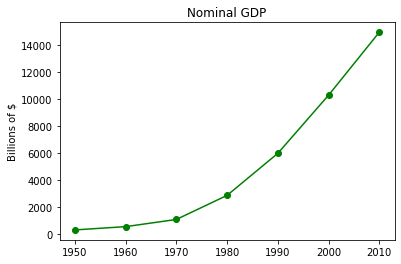

In [ ]:
from matplotlib import pyplot as plt 

years=[1950,1960,1970,1980,1990,2000,2010]
gdp=[300.2,543.3,1075.9,2862.5,5979.6,10289.7,14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years,gdp,color='green',marker='o',linestyle='solid')

# add a title

plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")

plt.show() # code to print out final chart

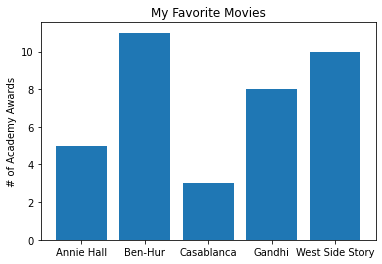

In [ ]:
# Bar chart example #1

movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]


# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(movies,num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

# label x-axis with movie names at bar centers
plt.show()

Text(0, 0.5, 'Count')

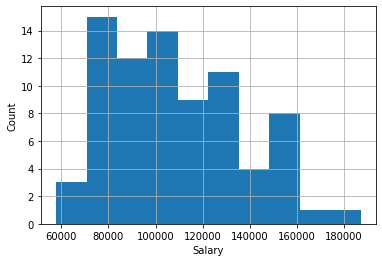

In [ ]:
# Histograms
# Create a histogram using pandas dataframe column.
df = pd.read_csv("https://raw.githubusercontent.com/Apress/data-analysis-and-visualization-using-python/master/Ch07/Salaries.csv")

df['salary'].hist()
plt.xlabel('Salary')
plt.ylabel('Count')

Text(0, 0.5, 'Years since PhD')

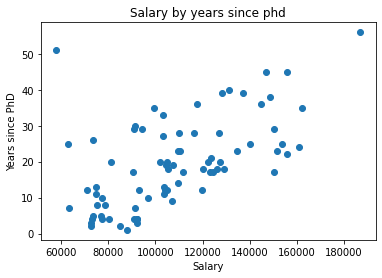

In [ ]:
# Scatterplots

plt.scatter(df['salary'], df['phd'])
plt.title("Salary by years since phd")
plt.xlabel("Salary")
plt.ylabel("Years since PhD")

# You can extend the visual power of matplot lib quickly by using seaborn tutorials

https://seaborn.pydata.org/tutorial.html

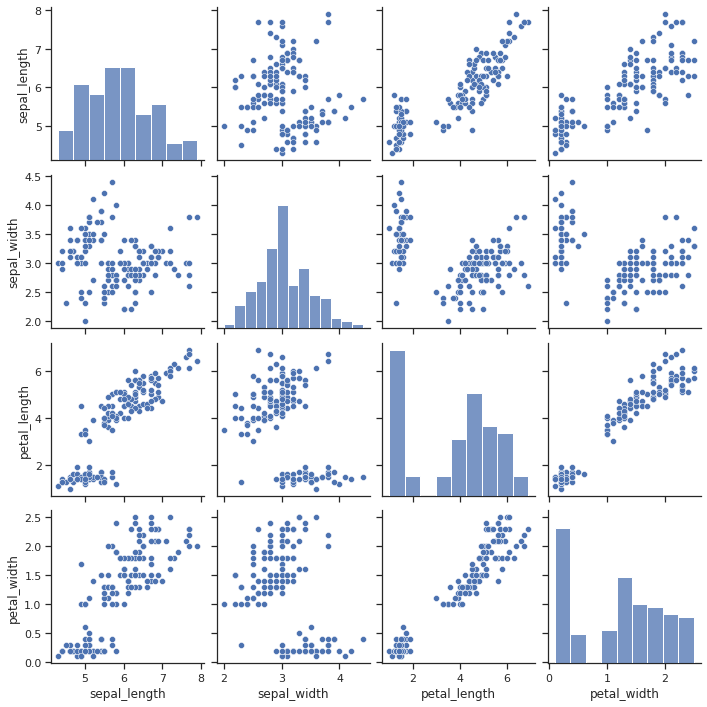

In [ ]:
# pairplots are a good example:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

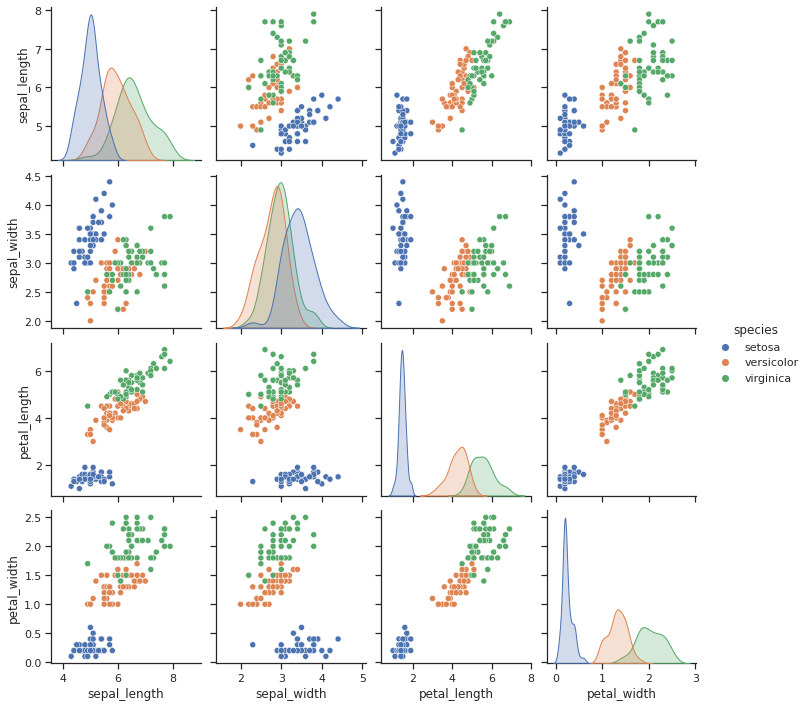

In [ ]:
# some more pairplot extensions:  https://seaborn.pydata.org/generated/seaborn.pairplot.html

g = sns.pairplot(iris, hue="species")

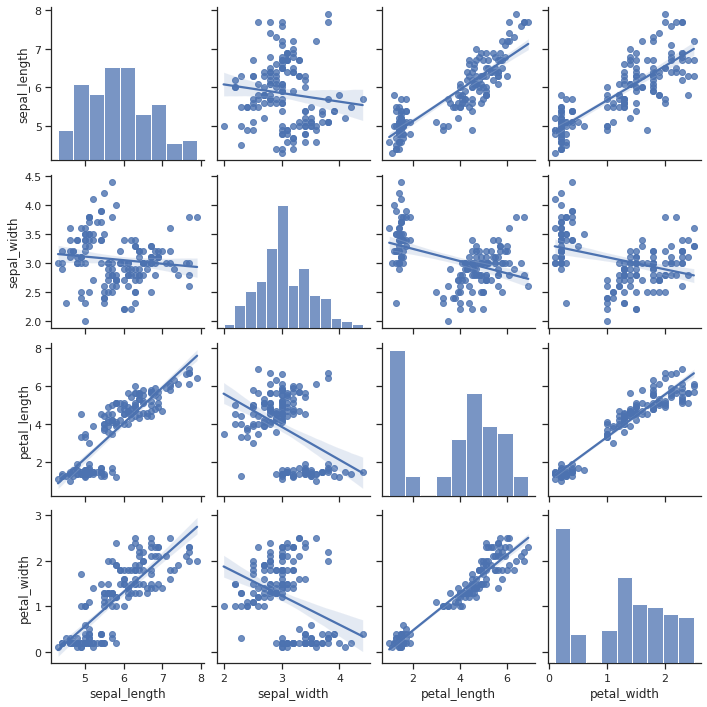

In [ ]:
# add regression lines
g = sns.pairplot(iris, kind="reg")